# Alghi Exploration Scripts

Helloow it's me

### Table of Contents

<ol>
    <li>
        <a href="#Alghi-Exploration-Scripts">Introduction</a></li>
        <ol>
            <li><a href="#Run-this-for-Collab">Run this for Collab</a></li>
            <li><a href="#Run-this-for-Local-Notebook">Run this for Local Notebook</a></li>
        </ol>
    </li>
    <li>
        <a href="#VAERS---Data-Exploration">VAERS NLP Data Exploration</a>
        <ol>
            <li><a href="#Model-Building">Model Building</a></li>
            <li><a href="#Transfer-Learning">Transfer Learning</a></li>
            <li><a href="#No-Transfer-Learning">No Transfer Learning</a></li>
        </ol>
    </li>
    <li>
        <a>(WIP) VAERS NLP Data Deployment</a>
    </li>
    <li>
        <a href="#Covid-19-Symptoms">Covid-19 Symptoms Data Exploration</a>
    </li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
import random

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import statsmodels.api as sm

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.4.1


In [3]:
# Kalau perlu install dulu
# !pip install tensorflowjs

### Run this for Collab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Collab 1
vaers_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Colab Notebooks/data/VAERS/2021VAERSDATA.csv', sep=',', encoding = "ISO-8859-1", dtype={
    'RPT_DATE': str,
    'ER_VISIT': str,
    'V_FUNDBY': str,
    'SYMPTOM_TEXT': str
})
display(vaers_df.columns)
vaers_sym = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Colab Notebooks/data/VAERS/2021VAERSSYMPTOMS.csv', sep=',', encoding = "ISO-8859-1")
display(vaers_sym.columns)

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [ ]:
# Collab 2
vaers_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/2021VAERSData/2021VAERSDATA.csv', sep=',', encoding = "ISO-8859-1", dtype={
    'RPT_DATE': str,
    'ER_VISIT': str,
    'V_FUNDBY': str,
    'SYMPTOM_TEXT': str
})
display(vaers_df.columns)
vaers_sym = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/2021VAERSData/2021VAERSSYMPTOMS.csv', sep=',', encoding = "ISO-8859-1")
display(vaers_sym.columns)

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

### Run this for Local Notebook

In [4]:
vaers_df = pd.read_csv(filepath_or_buffer='../data/raw/VAERS/2021VAERSDATA.csv', sep=',', encoding = "ISO-8859-1", dtype={
    'RPT_DATE': str,
    'ER_VISIT': str,
    'V_FUNDBY': str,
    'SYMPTOM_TEXT': str
})
display(vaers_df.columns)
vaers_sym = pd.read_csv(filepath_or_buffer='../data/raw/VAERS/2021VAERSSYMPTOMS.csv', sep=',', encoding = "ISO-8859-1")
display(vaers_sym.columns)

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

# VAERS - Data Exploration

In [5]:
print(vaers_df.shape)

(108191, 35)


In [6]:
vaers_df['VAERS_ID'].unique().shape

(108191,)

### Column Descriptions

Refer to VAERSDataUseGuide_November2020.pdf.

Sample 1:

In [ ]:
vaers_df.iloc[0]

VAERS_ID                                                   916600
RECVDATE                                               01/01/2021
STATE                                                          TX
AGE_YRS                                                        33
CAGE_YR                                                        33
CAGE_MO                                                       NaN
SEX                                                             F
RPT_DATE                                                      NaN
SYMPTOM_TEXT    Right side of epiglottis swelled up and hinder...
DIED                                                          NaN
DATEDIED                                                      NaN
L_THREAT                                                      NaN
ER_VISIT                                                      NaN
HOSPITAL                                                      NaN
HOSPDAYS                                                      NaN
X_STAY    

In [ ]:
vaers_df.iloc[0]['SYMPTOM_TEXT']

'Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken'

Sample 2:

In [ ]:
vaers_df.iloc[3]

VAERS_ID                                                   916603
RECVDATE                                               01/01/2021
STATE                                                          WA
AGE_YRS                                                        58
CAGE_YR                                                        58
CAGE_MO                                                       NaN
SEX                                                             F
RPT_DATE                                                      NaN
SYMPTOM_TEXT    extreme fatigue, dizziness,. could not lift my...
DIED                                                          NaN
DATEDIED                                                      NaN
L_THREAT                                                      NaN
ER_VISIT                                                      NaN
HOSPITAL                                                      NaN
HOSPDAYS                                                      NaN
X_STAY    

In [ ]:
vaers_df.iloc[3]['SYMPTOM_TEXT']

'extreme fatigue, dizziness,. could not lift my left arm for 72 hours'

In [ ]:
vaers_df.iloc[3]['HISTORY']

'diverticulitis, mitral valve prolapse, osteoarthritis'

In [ ]:
vaers_df.iloc[3]['PRIOR_VAX']

'got measles from measel shot, mums from mumps shot, headaches and nausea from flu shot'

Sample 3:

In [ ]:
vaers_df[vaers_df['HOSPITAL'] == 'Y'].head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
30,916632,01/01/2021,NaN,0.08,0.0,0.1,M,NaN,Baby had regular 6 week wellness check-up and ...,NaN,...,N/a,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,N/a
105,916710,01/01/2021,MO,23.00,23.0,NaN,F,NaN,"Acute appendicitis, onset morning of 1/1/2021 ...",NaN,...,NaN,Hypothyroidism,NaN,NaN,2,01/01/2021,NaN,NaN,Y,NKDA
188,916803,01/01/2021,LA,78.00,78.0,NaN,M,NaN,respitory colase,Y,...,none,"large T-cell lymphoma, HTN, Gout, recieving t...",NaN,NaN,2,01/01/2021,NaN,NaN,NaN,N?A
193,916809,01/01/2021,WA,40.00,40.0,NaN,F,NaN,CAREGIVER RECEIVED FIRST VACCINE DOSE AND SOON...,NaN,...,None,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,None
218,916836,01/01/2021,MD,55.00,55.0,NaN,M,NaN,Patient is a 55 year old male with no past med...,NaN,...,Pt reported frequent urination for several months,None,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,No known allergies


In [ ]:
vaers_df.iloc[30]

VAERS_ID                                                   916632
RECVDATE                                               01/01/2021
STATE                                                         NaN
AGE_YRS                                                      0.08
CAGE_YR                                                         0
CAGE_MO                                                       0.1
SEX                                                             M
RPT_DATE                                                      NaN
SYMPTOM_TEXT    Baby had regular 6 week wellness check-up and ...
DIED                                                          NaN
DATEDIED                                                      NaN
L_THREAT                                                        Y
ER_VISIT                                                      NaN
HOSPITAL                                                        Y
HOSPDAYS                                                      NaN
X_STAY    

In [ ]:
vaers_df.iloc[30]['SYMPTOM_TEXT']

'Baby had regular 6 week wellness check-up and received all reccomended vaccinations for 6 week old baby.   Straight after vaccination baby went to sleep, he then woke up 1 hour after with a screaming cry as if something was terribly wrong,  he then started vomiting uncontrollably (like a water fountain) and was in and out of consciousness, very lethargic, breathing started to reduce drastically, baby was floppy. Baby was handed to paramedics and rushed to emergency.    After event of vaccine reaction, doctors encouraged to continue with vaccinations,  baby was continuously in and out of hospital, suffered from stomach problems/pain as a todler and would notice todler seeking anything cold, usually resulting to lying down on stomach  on the cold floor because stomach was always burning hot. He would vomit regularly, suffer from regular nose bleeds for no apparent reason, behavioural/anger issues were displayed, headaches, asthma, and dry skin.'

In [ ]:
vaers_df['HOSPITAL'].isna().sum()

100092

In [ ]:
vaers_df['HOSPITAL'].unique()

array([nan, 'Y'], dtype=object)

In [ ]:
vaers_df['ER_VISIT'].isna().sum()

108176

In [ ]:
vaers_df['ER_VISIT'].unique()

array([nan, 'Y'], dtype=object)

In [ ]:
vaers_df['OFC_VISIT'].isna().sum()

90360

In [ ]:
vaers_df['OFC_VISIT'].unique()

array(['Y', nan], dtype=object)

In [ ]:
vaers_df['ER_ED_VISIT'].isna().sum()

93638

In [ ]:
vaers_df['ER_ED_VISIT'].unique()

array([nan, 'Y'], dtype=object)

In [ ]:
vaers_df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [ ]:
vaers_df[['DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'DISABLE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT']].isna().T.all().sum()

72458

In [ ]:
vaers_df['AGE_YRS']

0         33.0
1         73.0
2         23.0
3         58.0
4         47.0
5         44.0
6         50.0
7         33.0
8         71.0
9         18.0
10        33.0
11        71.0
12        40.0
13        29.0
14        38.0
15        35.0
16        24.0
17        28.0
18        65.0
19        25.0
20        22.0
21        31.0
22        27.0
23        41.0
24        63.0
25        49.0
26        33.0
27        61.0
28        56.0
29        25.0
          ... 
108161     NaN
108162    45.0
108163    54.0
108164    95.0
108165     NaN
108166    57.0
108167     NaN
108168    56.0
108169     NaN
108170     NaN
108171     NaN
108172     NaN
108173     NaN
108174     NaN
108175     NaN
108176     NaN
108177    83.0
108178     NaN
108179    74.0
108180     NaN
108181     NaN
108182    60.0
108183    69.0
108184    62.0
108185    27.0
108186    73.0
108187     NaN
108188    25.0
108189    18.0
108190    80.0
Name: AGE_YRS, Length: 108191, dtype: float64

In [ ]:
vaers_df['CUR_ILL'].unique()

array(['None',
       'Patient residing at nursing facility. See patients chart.',
       'kidney infection', ...,
       'Alcohol use (Moderate to light.); Essential hypertension; Food allergy; Nonsmoker',
       'Alcohol use (Once a week.); Non-smoker; Seasonal allergy',
       'Pollen allergy'], dtype=object)

Machine Learning Features and Target

Features:

- SYMPTOM_TEXT (text)
- SYMPTOM LIST (appended to text)

Target:

- 0 if any of 'DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'DISABLE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT' is Y
- 1 otherwise

### SYMPTOM_TEXT analysis (how dirty is the data, etc.)

In [ ]:
trunc_type="post"

X_sample = vaers_df[['SYMPTOM_TEXT']]
X_sample = X_sample.iloc[8:9]
X_sample = np.array(X_sample).reshape(X_sample.shape[0]).astype('str')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_sample)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_sample)
padded = pad_sequences(sequences, truncating=trunc_type)

display(X_sample)
display(word_index)

array(['On day 9 following the vaccination I noticed a red raised itchy patch at the vaccination site approximately 2 in X 2 in. No other symptoms.'],
      dtype='<U139')

{'2': 3,
 '9': 7,
 'a': 11,
 'approximately': 18,
 'at': 16,
 'day': 6,
 'following': 8,
 'i': 9,
 'in': 4,
 'itchy': 14,
 'no': 20,
 'noticed': 10,
 'on': 5,
 'other': 21,
 'patch': 15,
 'raised': 13,
 'red': 12,
 'site': 17,
 'symptoms': 22,
 'the': 1,
 'vaccination': 2,
 'x': 19}

# Model Building

### Feature Extraction

In [5]:
X = vaers_sym.fillna('')
X['text']=X['SYMPTOM1']+", "+X['SYMPTOM2']+", "+X['SYMPTOM3']+", "+X['SYMPTOM4']+", "+X['SYMPTOM5']
X = X.drop(['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5'], axis=1)
Z = X.groupby('VAERS_ID')['text'].transform(lambda x: ', '.join(x))
Z

0                             Dysphagia, Epiglottitis, , , 
1                                   Anxiety, Dyspnoea, , , 
2         Chest discomfort, Dysphagia, Pain in extremity...
3                Dizziness, Fatigue, Mobility decreased, , 
4         Injection site erythema, Injection site prurit...
5                               Pharyngeal swelling, , , , 
6                Abdominal pain, Chills, Sleep disorder, , 
7                         Diarrhoea, Nasal congestion, , , 
8         Vaccination site erythema, Vaccination site pr...
9                                     Rash, Urticaria, , , 
10        Blood pressure decreased, Chest pain, Chills, ...
11        Blood pressure decreased, Chest pain, Chills, ...
12        Blood pressure decreased, Chest pain, Chills, ...
13        Blood pressure decreased, Chest pain, Chills, ...
14        Blood pressure decreased, Chest pain, Chills, ...
15                            Ear pain, Hypoaesthesia, , , 
16           Abdominal pain upper, Dizzi

In [6]:
my_sym_X = pd.concat([X['VAERS_ID'], Z], axis=1)
my_sym_X = my_sym_X.drop_duplicates(subset='VAERS_ID', keep="first")
my_sym_X.reset_index(inplace=True, drop=True)
my_sym_X

,VAERS_ID,text
0,916600,"Dysphagia, Epiglottitis, , ,"
1,916601,"Anxiety, Dyspnoea, , ,"
2,916602,"Chest discomfort, Dysphagia, Pain in extremity..."
3,916603,"Dizziness, Fatigue, Mobility decreased, ,"
4,916604,"Injection site erythema, Injection site prurit..."
5,916606,"Pharyngeal swelling, , , ,"
6,916607,"Abdominal pain, Chills, Sleep disorder, ,"
7,916608,"Diarrhoea, Nasal congestion, , ,"
8,916609,"Vaccination site erythema, Vaccination site pr..."
9,916610,"Rash, Urticaria, , ,"


In [7]:
sym_X = np.array(my_sym_X['text'])
new_sym_X = []
for x in sym_X:
  new_syms = ''
  for sym in x.split(', '):
    if sym:
      if new_syms:
        new_syms += ', ' + sym
      else:
        new_syms = sym
  new_sym_X.append(new_syms)

sym_X = np.array(new_sym_X)
sym_X = pd.concat([my_sym_X['VAERS_ID'], pd.Series(sym_X, name='symptoms')], axis=1)
sym_X

,VAERS_ID,symptoms
0,916600,"Dysphagia, Epiglottitis"
1,916601,"Anxiety, Dyspnoea"
2,916602,"Chest discomfort, Dysphagia, Pain in extremity..."
3,916603,"Dizziness, Fatigue, Mobility decreased"
4,916604,"Injection site erythema, Injection site prurit..."
5,916606,Pharyngeal swelling
6,916607,"Abdominal pain, Chills, Sleep disorder"
7,916608,"Diarrhoea, Nasal congestion"
8,916609,"Vaccination site erythema, Vaccination site pr..."
9,916610,"Rash, Urticaria"


In [8]:
vaers_X = vaers_df[['VAERS_ID', 'SYMPTOM_TEXT']]
vaers_X

,VAERS_ID,SYMPTOM_TEXT
0,916600,Right side of epiglottis swelled up and hinder...
1,916601,Approximately 30 min post vaccination administ...
2,916602,"About 15 minutes after receiving the vaccine, ..."
3,916603,"extreme fatigue, dizziness,. could not lift my..."
4,916604,"Injection site swelling, redness, warm to the ..."
5,916606,patient called back the next day and stated he...
6,916607,SEVERE chills approximately 13-14 hours after ...
7,916608,Nasal congestion and diarrhea
8,916609,On day 9 following the vaccination I noticed a...
9,916610,hives and rash all over body that has not gone...


In [9]:
full_X = pd.merge(vaers_X, sym_X, on=['VAERS_ID'])
full_X['fulltext'] = 'My symptoms are ' + full_X['symptoms'] + ". " + full_X['SYMPTOM_TEXT']
X = full_X[['fulltext']]
display(full_X.head())
display(X)

,VAERS_ID,SYMPTOM_TEXT,symptoms,fulltext
0,916600,Right side of epiglottis swelled up and hinder...,"Dysphagia, Epiglottitis","My symptoms are Dysphagia, Epiglottitis. Right..."
1,916601,Approximately 30 min post vaccination administ...,"Anxiety, Dyspnoea","My symptoms are Anxiety, Dyspnoea. Approximate..."
2,916602,"About 15 minutes after receiving the vaccine, ...","Chest discomfort, Dysphagia, Pain in extremity...","My symptoms are Chest discomfort, Dysphagia, P..."
3,916603,"extreme fatigue, dizziness,. could not lift my...","Dizziness, Fatigue, Mobility decreased","My symptoms are Dizziness, Fatigue, Mobility d..."
4,916604,"Injection site swelling, redness, warm to the ...","Injection site erythema, Injection site prurit...","My symptoms are Injection site erythema, Injec..."


,fulltext
0,"My symptoms are Dysphagia, Epiglottitis. Right..."
1,"My symptoms are Anxiety, Dyspnoea. Approximate..."
2,"My symptoms are Chest discomfort, Dysphagia, P..."
3,"My symptoms are Dizziness, Fatigue, Mobility d..."
4,"My symptoms are Injection site erythema, Injec..."
5,My symptoms are Pharyngeal swelling. patient c...
6,"My symptoms are Abdominal pain, Chills, Sleep ..."
7,"My symptoms are Diarrhoea, Nasal congestion. N..."
8,"My symptoms are Vaccination site erythema, Vac..."
9,"My symptoms are Rash, Urticaria. hives and ras..."


### Target Extraction

In [10]:
new_vaers_df = pd.merge(vaers_df, sym_X, on=['VAERS_ID'])

In [11]:
# Non-binary classification
y_target = np.zeros(len(new_vaers_df))
target_level_1 = ~new_vaers_df[['HOSPITAL', 'OFC_VISIT']].isna().T.all()
target_level_2 = ~new_vaers_df[['DIED', 'L_THREAT', 'ER_VISIT', 'DISABLE', 'BIRTH_DEFECT', 'ER_ED_VISIT']].isna().T.all()
y_target[target_level_1] = 1
y_target[target_level_2] = 2
y_target = tf.one_hot(y_target, 3).numpy()
y_target

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [12]:
# Binary classification
y_variation_1 = new_vaers_df[['DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'DISABLE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT']].isna().T.all()
y_variation_2 = new_vaers_df[['DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'DISABLE', 'BIRTH_DEFECT', 'ER_ED_VISIT']].isna().T.all()

### Train-Test Split

In [13]:
# Train-Test Split

y = y_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)
X_train = np.array(X_train).reshape(X_train.shape[0]).astype('str')
X_test = np.array(X_test).reshape(X_test.shape[0]).astype('str')

print(X_train.shape)
print(y_train.shape)
print([y_train[:,i].sum() for i in range(3)])
print(X_test.shape)
print(y_test.shape)
print([y_test[:,i].sum() for i in range(3)])

(86552,)
(86552, 3)
[57989.0, 13367.0, 15196.0]
(21638,)
(21638, 3)
[14469.0, 3364.0, 3805.0]


In [14]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## Transfer Learning

### Small Model

In [ ]:
embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])
print(embeddings.shape)
embeddings

(2, 20)


<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 0.8666395 ,  0.35917717,  0.00579667,  0.681002  , -0.54226625,
         0.22343189, -0.38796625,  0.62195706,  0.22117122, -0.48538068,
        -1.2674141 ,  0.886369  , -0.32849073, -0.13924702, -0.53327686,
         0.5739708 , -0.05905761,  0.13629246, -1.1718255 , -0.31494334],
       [ 0.9602181 ,  0.62520486,  0.06261905,  0.37425604,  0.24782333,
        -0.39351934, -0.7418429 ,  0.56599647, -0.26197797, -0.69016844,
        -0.76565284,  0.71412426, -0.4537978 , -0.50701594, -0.8499377 ,
         0.8917156 , -0.30278975,  0.2149126 , -1.1098894 , -0.46719775]],
      dtype=float32)>

In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1", output_shape=[20],
                           input_shape=[], dtype=tf.string)
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                389380    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 389,733
Trainable params: 353
Non-trainable params: 389,380
_________________________________________________________________


In [ ]:
num_epochs = 100
history = model.fit(X_train, y_train, batch_size=128, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5504 - accuracy: 0.7208 - val_loss: 0.5527 - val_accuracy: 0.7194
Epoch 2/100
677/677 [==============================] - 3s 4ms/step - loss: 0.5497 - accuracy: 0.7222 - val_loss: 0.5576 - val_accuracy: 0.7168
Epoch 3/100
677/677 [==============================] - 3s 4ms/step - loss: 0.5491 - accuracy: 0.7212 - val_loss: 0.5521 - val_accuracy: 0.7184
Epoch 4/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5487 - accuracy: 0.7226 - val_loss: 0.5511 - val_accuracy: 0.7190
Epoch 5/100
677/677 [==============================] - 3s 4ms/step - loss: 0.5480 - accuracy: 0.7237 - val_loss: 0.5518 - val_accuracy: 0.7198
Epoch 6/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5475 - accuracy: 0.7244 - val_loss: 0.5546 - val_accuracy: 0.7184
Epoch 7/100
677/677 [==============================] - 3s 4ms/step - loss: 0.5470 - accuracy: 0.7242 - val_loss: 0.5505 - val_accuracy: 0.7203

Epoch 58/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5394 - accuracy: 0.7297 - val_loss: 0.5448 - val_accuracy: 0.7259
Epoch 59/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5393 - accuracy: 0.7299 - val_loss: 0.5491 - val_accuracy: 0.7261
Epoch 60/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5392 - accuracy: 0.7290 - val_loss: 0.5487 - val_accuracy: 0.7250
Epoch 61/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5392 - accuracy: 0.7291 - val_loss: 0.5479 - val_accuracy: 0.7261
Epoch 62/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5393 - accuracy: 0.7295 - val_loss: 0.5461 - val_accuracy: 0.7265
Epoch 63/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5391 - accuracy: 0.7287 - val_loss: 0.5459 - val_accuracy: 0.7266
Epoch 64/100
677/677 [==============================] - 3s 5ms/step - loss: 0.5389 - accuracy: 0.7304 - val_loss: 0.5452 - val_accuracy:

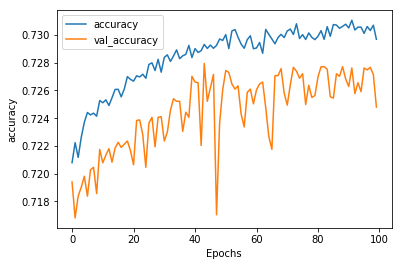

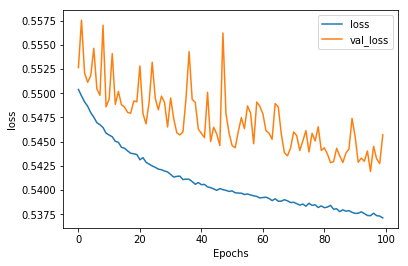

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Medium Model

In [ ]:
embed = hub.load("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])
print(embeddings.shape)
embeddings

(2, 50)


<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.16589954,  0.0254965 ,  0.1574857 ,  0.17688066,  0.02911299,
        -0.03092718,  0.19445257, -0.05709129, -0.08631689, -0.04391516,
         0.13032274,  0.10905275, -0.08515751,  0.01056632, -0.17220995,
        -0.17925954,  0.19556305,  0.0802278 , -0.03247919, -0.49176937,
        -0.07767699, -0.03160921, -0.13952136,  0.05959712,  0.06858718,
         0.22386682, -0.16653948,  0.19412343, -0.05491862,  0.10997339,
        -0.15811177, -0.02576607, -0.07910853, -0.258499  , -0.04206644,
        -0.20052543,  0.1705603 , -0.15314153,  0.0039225 , -0.28694248,
         0.02468278,  0.11069503,  0.03733957,  0.01433943, -0.11048374,
         0.11931834, -0.11552787, -0.11110869,  0.02384969, -0.07074881],
       [ 0.1437864 ,  0.08291595,  0.10897306,  0.04464385, -0.03630389,
        -0.12605834,  0.20263346,  0.12862863, -0.07873426, -0.01195358,
         0.0020956 , -0.03080653, -0.08019945, -0.18797135, -0.11973457,
 

In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1", output_shape=[50],
                           input_shape=[], dtype=tf.string, trainable=True)
model = tf.keras.Sequential([
    hub_layer,
    # tf.keras.layers.Reshape((50, 1)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_8 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_26 (Dense)             (None, 128)               6528      
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 387       
Total params: 48,197,515
Trainable params: 48,197,515
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 20
history = model.fit(X_train, y_train, batch_size=128, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/20
677/677 [==============================] - 11s 15ms/step - loss: 0.7267 - accuracy: 0.7160 - val_loss: 0.5726 - val_accuracy: 0.7750
Epoch 2/20
677/677 [==============================] - 10s 14ms/step - loss: 0.5473 - accuracy: 0.7905 - val_loss: 0.5558 - val_accuracy: 0.7847
Epoch 3/20
677/677 [==============================] - 10s 14ms/step - loss: 0.5146 - accuracy: 0.8041 - val_loss: 0.5556 - val_accuracy: 0.7876
Epoch 4/20
677/677 [==============================] - 9s 14ms/step - loss: 0.4900 - accuracy: 0.8182 - val_loss: 0.5513 - val_accuracy: 0.7894
Epoch 5/20
677/677 [==============================] - 9s 14ms/step - loss: 0.4814 - accuracy: 0.8190 - val_loss: 0.5578 - val_accuracy: 0.7905
Epoch 6/20
677/677 [==============================] - 9s 14ms/step - loss: 0.4636 - accuracy: 0.8266 - val_loss: 0.5622 - val_accuracy: 0.7900
Epoch 7/20
677/677 [==============================] - 10s 14ms/step - loss: 0.4571 - accuracy: 0.8297 - val_loss: 0.5651 - val_accuracy: 0.

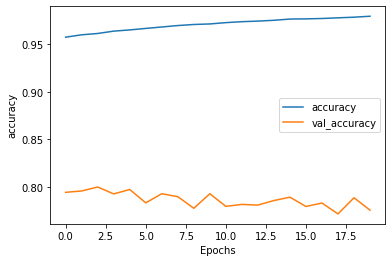

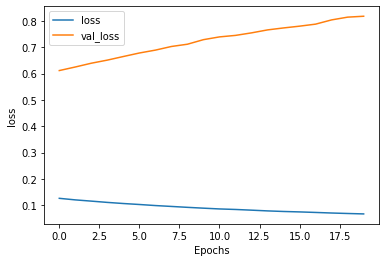

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Medium Model with Sophisticated NN


In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1", output_shape=[50],
                           input_shape=[], dtype=tf.string, trainable=True)
model = tf.keras.Sequential([
    hub_layer,
    # tf.keras.layers.Reshape((50, 1)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_24 (Dense)             (None, 256)               13056     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 771       
Total params: 48,204,427
Trainable params: 48,204,427
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 100
history = model.fit(X_train, y_train, batch_size=128, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/100
677/677 [==============================] - 10s 15ms/step - loss: 0.7185 - accuracy: 0.7171 - val_loss: 0.5718 - val_accuracy: 0.7741
Epoch 2/100
677/677 [==============================] - 9s 14ms/step - loss: 0.5445 - accuracy: 0.7926 - val_loss: 0.5557 - val_accuracy: 0.7863
Epoch 3/100
677/677 [==============================] - 9s 14ms/step - loss: 0.5064 - accuracy: 0.8067 - val_loss: 0.5503 - val_accuracy: 0.7883
Epoch 4/100
677/677 [==============================] - 9s 14ms/step - loss: 0.4867 - accuracy: 0.8135 - val_loss: 0.5536 - val_accuracy: 0.7896
Epoch 5/100
677/677 [==============================] - 9s 14ms/step - loss: 0.4674 - accuracy: 0.8251 - val_loss: 0.5550 - val_accuracy: 0.7887
Epoch 6/100
677/677 [==============================] - 9s 14ms/step - loss: 0.4559 - accuracy: 0.8286 - val_loss: 0.5563 - val_accuracy: 0.7899
Epoch 7/100
677/677 [==============================] - 9s 14ms/step - loss: 0.4425 - accuracy: 0.8344 - val_loss: 0.5672 - val_accuracy

KeyboardInterrupt: ignored

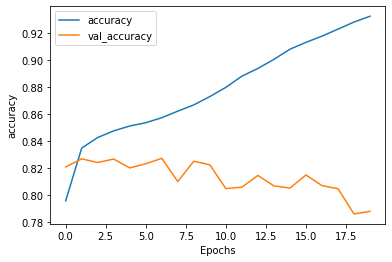

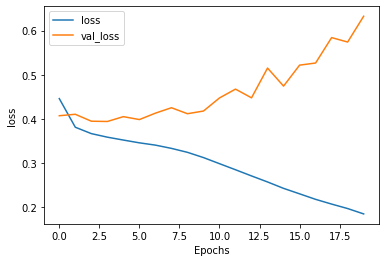

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Large Model with Sophisticated NN

### Non-Binary Classification (Non-Trainable parameter)

In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", output_shape=[128],
                           input_shape=[], dtype=tf.string)
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Reshape((128, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
reshape (Reshape)            (None, 128, 1)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               33792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 771       
Total params: 124,710,275
Trainable params: 67,587
Non-trainable params: 124,642,688
___________________________________

In [ ]:
num_epochs = 100
history = model.fit(X_train, y_train, batch_size=128, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/100
677/677 [==============================] - 20s 26ms/step - loss: 0.8697 - accuracy: 0.6676 - val_loss: 0.8371 - val_accuracy: 0.6708
Epoch 2/100
677/677 [==============================] - 20s 30ms/step - loss: 0.8238 - accuracy: 0.6789 - val_loss: 0.8128 - val_accuracy: 0.6748
Epoch 3/100
677/677 [==============================] - 18s 26ms/step - loss: 0.8075 - accuracy: 0.6818 - val_loss: 0.8107 - val_accuracy: 0.6760
Epoch 4/100
677/677 [==============================] - 19s 28ms/step - loss: 0.7904 - accuracy: 0.6877 - val_loss: 0.8398 - val_accuracy: 0.6488
Epoch 5/100
677/677 [==============================] - 18s 27ms/step - loss: 0.7830 - accuracy: 0.6914 - val_loss: 0.7947 - val_accuracy: 0.6888
Epoch 6/100
677/677 [==============================] - 21s 30ms/step - loss: 0.7737 - accuracy: 0.6967 - val_loss: 0.7864 - val_accuracy: 0.6924
Epoch 7/100
677/677 [==============================] - 20s 29ms/step - loss: 0.7682 - accuracy: 0.6996 - val_loss: 0.7708 - val_ac

KeyboardInterrupt: ignored

### Non-Binary Classification (Trainable parameter)

In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", output_shape=[128],
                           input_shape=[], dtype=tf.string, trainable=True)
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Reshape((128, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='sigmoid'),
])
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(5e-4),metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_12 (KerasLayer)  (None, 128)               124642688 
_________________________________________________________________
reshape_3 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 32)                2304      
_________________________________________________________________
dense_36 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 195       
Total params: 124,647,299
Trainable params: 124,647,299
Non-trainable params: 0
_______________________________________

In [ ]:
num_epochs = 10
history = model.fit(X_train, y_train, batch_size=128, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10


677/677 [==============================] - 30s 39ms/step - loss: 0.7857 - accuracy: 0.7019 - val_loss: 0.6045 - val_accuracy: 0.7642
Epoch 2/10
677/677 [==============================] - 25s 38ms/step - loss: 0.5908 - accuracy: 0.7736 - val_loss: 0.5817 - val_accuracy: 0.7773
Epoch 3/10
677/677 [==============================] - 25s 38ms/step - loss: 0.5538 - accuracy: 0.7898 - val_loss: 0.5662 - val_accuracy: 0.7834
Epoch 4/10
677/677 [==============================] - 25s 37ms/step - loss: 0.5330 - accuracy: 0.7997 - val_loss: 0.5586 - val_accuracy: 0.7863
Epoch 5/10
677/677 [==============================] - 25s 38ms/step - loss: 0.5154 - accuracy: 0.8080 - val_loss: 0.5624 - val_accuracy: 0.7863
Epoch 6/10
677/677 [==============================] - 25s 38ms/step - loss: 0.4987 - accuracy: 0.8158 - val_loss: 0.5638 - val_accuracy: 0.7881
Epoch 7/10
677/677 [==============================] - 25s 37ms/step - loss: 0.4815 - accuracy: 0.8251 - val_loss: 0.5792 - val_accuracy: 0.7881
Epo

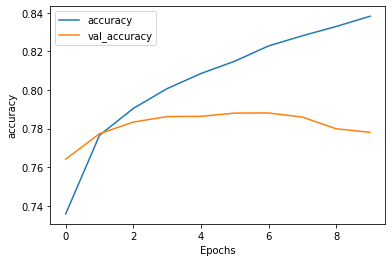

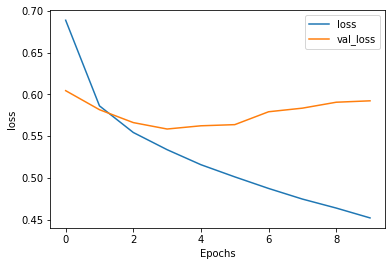

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
predicted = model.predict(X_test)
predicted = tf.argmax(predicted, axis=1)
expected = tf.argmax(y_test, axis=1)

In [ ]:
confused_matrix = tf.math.confusion_matrix(expected, predicted).numpy()
print(confused_matrix)
sum_row = [temp.sum() for temp in confused_matrix]
print(sum_row)
[confused_matrix[i] / sum_row[i] for i in range(3)]

[[13158   700   583]
 [ 1786  1045   548]
 [  812   373  2633]]
[14441, 3379, 3818]


[array([0.91115574, 0.0484731 , 0.04037117]),
 array([0.52855875, 0.3092631 , 0.16217816]),
 array([0.21267679, 0.09769513, 0.68962808])]

### Binary Classification

In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1", output_shape=[128],
                           input_shape=[], dtype=tf.string)
model = tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Reshape((128, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_17 (KerasLayer)  (None, 128)               124642688 
_________________________________________________________________
reshape_7 (Reshape)          (None, 128, 1)            0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 64)                8704      
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 65        
Total params: 124,655,617
Trainable params: 12,929
Non-trainable params: 124,642,688
_________________________________________________________________


In [ ]:
num_epochs = 100
history = model.fit(X_train, y_train, batch_size=128, epochs=num_epochs, validation_data=(X_test, y_test))

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## No Transfer Learning

In [15]:
# Preprocess Texts

vocab_size = 40000
embedding_dim = 16
max_length = 400
trunc_type="post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [16]:
len(word_index)

39450

In [17]:
X_train[0]

'My symptoms are Nausea, Pyrexia. Received vaccine afternoon of 1/19/21. Before going to bed that night, began to have fever and nausea. As of this afternoon (1p) only having  fever, no nausea.'

In [18]:
padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
# Output word_index to json file

import json

# Data to be written     
with open("word_index.json", "w") as outfile: 
    json.dump(word_index, outfile)

In [ ]:
# some inspirations:
#     layer = LSTM(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)

### Non-Binary Classification

In [29]:
import tensorflow.keras.backend as K

def weighted_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy

    Variables:
        weights: numpy array of shape (C,) where C is the number of classes

    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    weights = K.variable(weights)
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    return loss

class TerminateOnBaseline(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get("val_accuracy")
        if acc is not None:
            if acc >= 0.82:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

our_weights = np.array([1.0, 0.25, 2.0])
awesome_loss = weighted_categorical_crossentropy(our_weights)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(loss=awesome_loss,optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 16)           640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 715,267
Trainable params: 715,267
Non-trainable params: 0
_________________________________________________________________


In [45]:
num_epochs = 10
# history = model.fit(padded, y_train, batch_size=128, epochs=num_epochs, validation_data=(testing_padded, y_test))
history = model.fit(padded, y_train, batch_size=128, epochs=num_epochs, validation_data=(testing_padded, y_test), callbacks=[TerminateOnBaseline()])

Epoch 1/10
677/677 [==============================] - 34s 45ms/step - loss: 0.6232 - accuracy: 0.7190 - val_loss: 0.4483 - val_accuracy: 0.7835
Epoch 2/10
677/677 [==============================] - 29s 43ms/step - loss: 0.4112 - accuracy: 0.7857 - val_loss: 0.4025 - val_accuracy: 0.7868
Epoch 3/10
677/677 [==============================] - 30s 44ms/step - loss: 0.3840 - accuracy: 0.7896 - val_loss: 0.3876 - val_accuracy: 0.7844
Epoch 4/10
677/677 [==============================] - 30s 44ms/step - loss: 0.3801 - accuracy: 0.7871 - val_loss: 0.3948 - val_accuracy: 0.7879
Epoch 5/10
677/677 [==============================] - 30s 44ms/step - loss: 0.3678 - accuracy: 0.7929 - val_loss: 0.3962 - val_accuracy: 0.7748
Epoch 6/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3592 - accuracy: 0.7931 - val_loss: 0.3824 - val_accuracy: 0.7855
Epoch 7/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3499 - accuracy: 0.7918 - val_loss: 0.4006 - val_accuracy:

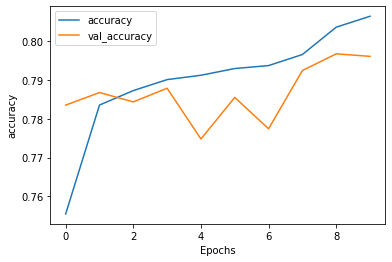

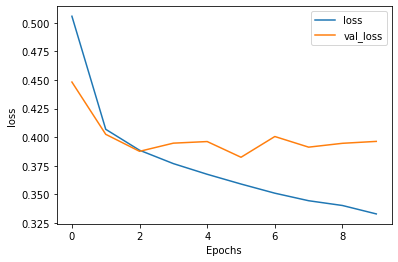

In [49]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [42]:
# model = model_from_json(open("../models/kipi-ml-v1.2/model.json").read())
model.load_weights(os.path.join(os.path.dirname(modelFile), 'my_model.h5'))
# predicted = model.predict(testing_padded)
# predicted = tf.argmax(predicted, axis=1)
# expected = tf.argmax(y_test, axis=1)

ValueError: Improper config format: {'format': 'layers-model', 'generatedBy': 'keras v2.4.0', 'convertedBy': 'TensorFlow.js Converter v3.6.0', 'modelTopology': {'keras_version': '2.4.0', 'backend': 'tensorflow', 'model_config': {'class_name': 'Sequential', 'config': {'name': 'sequential_6', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 400], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'embedding_6_input'}}, {'class_name': 'Embedding', 'config': {'name': 'embedding_6', 'trainable': True, 'batch_input_shape': [None, 400], 'dtype': 'float32', 'input_dim': 40000, 'output_dim': 16, 'embeddings_initializer': {'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': 400}}, {'class_name': 'Bidirectional', 'config': {'name': 'bidirectional_6', 'trainable': True, 'dtype': 'float32', 'layer': {'class_name': 'LSTM', 'config': {'name': 'lstm_6', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 2}}, 'merge_mode': 'concat'}}, {'class_name': 'Dense', 'config': {'name': 'dense_12', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout_6', 'trainable': True, 'dtype': 'float32', 'rate': 0.5, 'noise_shape': None, 'seed': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_13', 'trainable': True, 'dtype': 'float32', 'units': 3, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}]}}, 'training_config': {'loss': 'loss', 'metrics': [[{'class_name': 'MeanMetricWrapper', 'config': {'name': 'accuracy', 'dtype': 'float32', 'fn': 'categorical_accuracy'}}]], 'weighted_metrics': None, 'loss_weights': None, 'optimizer_config': {'class_name': 'RMSprop', 'config': {'name': 'RMSprop', 'learning_rate': 0.0010000000474974513, 'decay': 0.0, 'rho': 0.8999999761581421, 'momentum': 0.0, 'epsilon': 1e-07, 'centered': False}}}}, 'weightsManifest': [{'paths': ['group1-shard1of1.bin'], 'weights': [{'name': 'bidirectional_6/forward_lstm_6/lstm_cell_19/kernel', 'shape': [16, 256], 'dtype': 'float32'}, {'name': 'bidirectional_6/forward_lstm_6/lstm_cell_19/recurrent_kernel', 'shape': [64, 256], 'dtype': 'float32'}, {'name': 'bidirectional_6/forward_lstm_6/lstm_cell_19/bias', 'shape': [256], 'dtype': 'float32'}, {'name': 'bidirectional_6/backward_lstm_6/lstm_cell_20/kernel', 'shape': [16, 256], 'dtype': 'float32'}, {'name': 'bidirectional_6/backward_lstm_6/lstm_cell_20/recurrent_kernel', 'shape': [64, 256], 'dtype': 'float32'}, {'name': 'bidirectional_6/backward_lstm_6/lstm_cell_20/bias', 'shape': [256], 'dtype': 'float32'}, {'name': 'dense_12/kernel', 'shape': [128, 256], 'dtype': 'float32'}, {'name': 'dense_12/bias', 'shape': [256], 'dtype': 'float32'}, {'name': 'dense_13/kernel', 'shape': [256, 3], 'dtype': 'float32'}, {'name': 'dense_13/bias', 'shape': [3], 'dtype': 'float32'}, {'name': 'embedding_6/embeddings', 'shape': [40000, 16], 'dtype': 'float32'}]}]}

In [51]:
confused_matrix = tf.math.confusion_matrix(expected, predicted).numpy()
print(confused_matrix)
sum_row = [temp.sum() for temp in confused_matrix]
print(sum_row)
[confused_matrix[i] / sum_row[i] for i in range(3)]

[[13625    71   773]
 [ 2006   405   953]
 [  548    61  3196]]
[14469, 3364, 3805]


[array([0.94166839, 0.00490704, 0.05342456]),
 array([0.59631391, 0.12039239, 0.2832937 ]),
 array([0.14402102, 0.01603154, 0.83994744])]

In [40]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 
saved_model_path = "./my_model.h5"

# YOUR CODE HERE
model.save(saved_model_path)

In [32]:
# model = tf.keras.models.load_model("../models/kipi-ml-v1.2/my_model.h5")
# model
# model.save('my_model')

In [42]:
!zip -r /content/my_model.zip /content/my_model

updating: content/my_model/ (stored 0%)
updating: content/my_model/variables/ (stored 0%)
updating: content/my_model/variables/variables.data-00000-of-00001 (deflated 9%)
updating: content/my_model/variables/variables.index (deflated 65%)
updating: content/my_model/saved_model.pb (deflated 90%)
updating: content/my_model/assets/ (stored 0%)


In [43]:
saved_model_path = "./my_model.h5"
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2021-05-18 09:13:01.709070: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


### Binary Classification

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 16)           640000    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 128)               41472     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 257       
Total params: 714,753
Trainable params: 714,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded, y_train, batch_size=128, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/10
677/677 [==============================] - 34s 45ms/step - loss: 0.5005 - accuracy: 0.7691 - val_loss: 0.4858 - val_accuracy: 0.8031
Epoch 2/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3803 - accuracy: 0.8412 - val_loss: 0.4021 - val_accuracy: 0.8419
Epoch 3/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3598 - accuracy: 0.8503 - val_loss: 0.3791 - val_accuracy: 0.8345
Epoch 4/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3565 - accuracy: 0.8514 - val_loss: 0.3887 - val_accuracy: 0.8223
Epoch 5/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3464 - accuracy: 0.8569 - val_loss: 0.3853 - val_accuracy: 0.8446
Epoch 6/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3409 - accuracy: 0.8582 - val_loss: 0.3790 - val_accuracy: 0.8369
Epoch 7/10
677/677 [==============================] - 29s 43ms/step - loss: 0.3326 - accuracy: 0.8641 - val_loss: 0.3633 - val_accuracy:

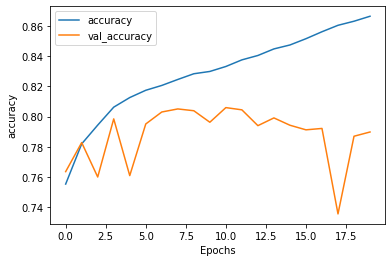

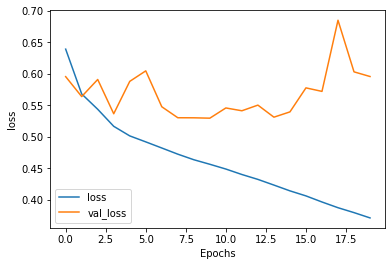

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Covid 19 Symptoms

https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/coronavirus-disease-covid-19

In [ ]:
symptoms_list = [
    ["Sesak napas", "Kehilangan selera makan", "Kebingungan", "Nyeri atau tekanan yang terus-menerus di dada", "Temperatur tinggi (di atas 38 ° C)"], # serious symptoms
    ["Demam", "Batuk kering", "Kelelahan"], # common_symptoms
    ["Kehilangan rasa atau bau", "Hidung tersumbat", "Konjungtivitis (juga dikenal sebagai mata merah)", "Sakit tenggorokan", "Sakit kepala", "Nyeri otot atau sendi", "Berbagai jenis ruam kulit", "Mual atau muntah", "Diare", "Menggigil atau pusing"],  # less common symptoms
    ["Iritabilitas", "Kebingungan", "Kesadaran berkurang (terkadang dikaitkan dengan kejang)", "Kecemasan", "Depresi", "Gangguan tidur", "Stroke", "Radang otak", "Delirium", "Kerusakan saraf"] # lesser common symptoms
]
symptoms_list = [[x.lower() for x in symptoms] for symptoms in symptoms_list]
symptoms_coeff = [1.0, 0.75, 0.5, 0.25]

def analyze_symptoms_probability(user_symptoms):
    total = 0.0
    for symptom in user_symptoms:
        for i in range(len(symptoms_list)):
            if symptom.lower() in symptoms_list[i]:
                total += symptoms_coeff[i]
                break
    return total

print(analyze_symptoms_probability(["demam", "sesak napas"]))
# should be 1.75

1.75
